In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [3]:
cancer = pd.read_csv('cancer.csv')

In [4]:
cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [6]:
cancer['Class'].value_counts()

1    357
2    212
Name: Class, dtype: int64

In [7]:
X = cancer.drop(['Class'],axis=1)

In [8]:
y = cancer['Class']

#Train And Test Splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#Feature Scaling

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#Cross Validation Models

##1. Holdout Method

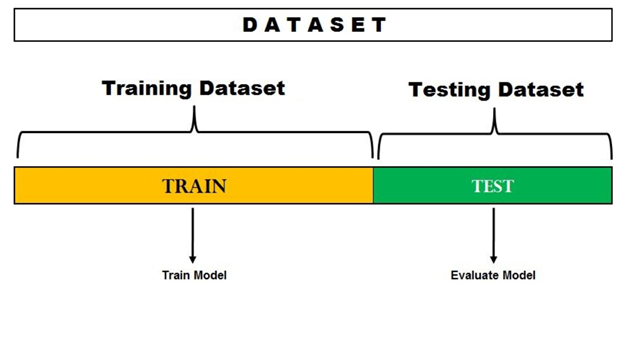
 
###Pros
•	This method is entirely data-independent.
•	This method requires only one execution, which results in cheaper computing costs.


###Cons
•	Due to the lower amount of data, the performance is more variable.


In [14]:
from sklearn.svm import SVC

svm_class = SVC()

from sklearn.model_selection import cross_val_score
svmacc = cross_val_score(svm_class, X, y, scoring='accuracy', cv = 10)
print(svmacc)

print("Mean accuracy: ",svmacc.mean())

[0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]
Mean accuracy:  0.9138784461152882


##2. K Fold

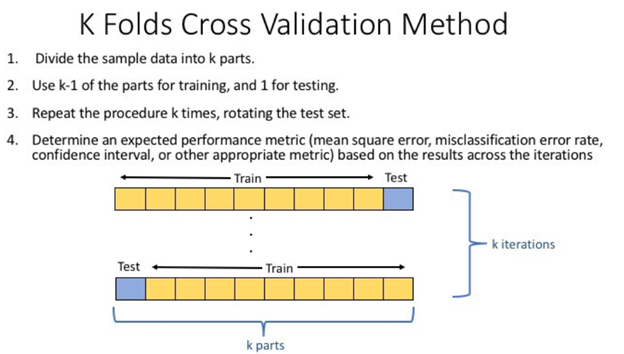


###Pros
•	This will aid in resolving the computing power issue.
•	Models may be unaffected by the presence of an outlier in the data.
•	It assists us in overcoming the issue of unpredictability.

###Cons
•	Incorrectly balanced data sets will affect our model.


In [ ]:
X = cancer.drop(['Class'],axis=1)

In [ ]:
y = cancer['Class']

In [ ]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=None) 

for train_index, test_index in kf.split(X):
      
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(456, 30) (113, 30) (456,) (113,)


In [ ]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9469026548672567

##Repeated K-Fold

In [ ]:
from sklearn.model_selection import RepeatedKFold 

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)


for train_index, test_index in rkf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  21  22  23  25  26  27  28  31  32  33  34  37  38  39  40  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  65
  67  68  69  70  71  73  74  75  77  79  80  81  82  83  84  85  87  88
  90  91  92  93  94  95  96  97  98  99 100 102 103 104 106 107 108 109
 110 111 112 113 114 115 116 119 120 121 122 123 125 127 128 129 130 131
 132 133 134 136 137 138 141 142 143 146 148 149 150 151 152 153 154 155
 157 160 161 162 163 168 170 171 172 173 174 175 177 178 180 181 182 183
 184 186 188 189 190 191 192 193 194 195 196 197 199 200 201 202 203 204
 205 206 208 210 211 212 213 214 215 216 217 218 219 220 222 223 224 225
 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 246 247 249 250 252 253 254 257 258 259 260 261 262 263 264 266 267 270
 271 272 273 274 276 277 278 279 280 281 282 283 284 285 286 288 289 290
 291 292 293 294 295 296 297 299 302 303 305

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(456, 30) (113, 30) (456,) (113,)


In [ ]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9823008849557522

##3. Stratified K-Fold

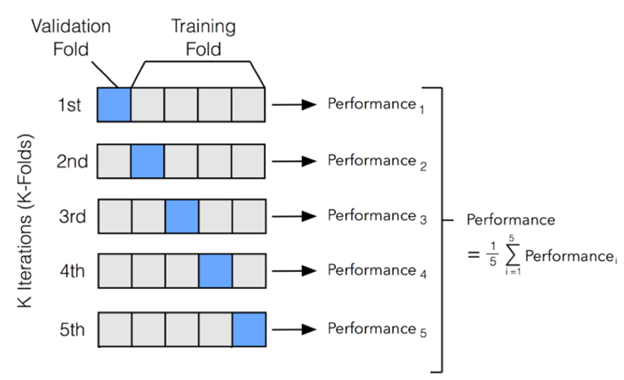

###Pros
•	It may enhance many models through hyper-parameter adjustment.
•	Assists us in comparing models.
•	It contributes to the reduction of both bias and variance.


###Cons
•	Execution is expensive.


In [11]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, val_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_test = y[train_index], y[val_index]

Train: [ 53  54  56  57  62  64  65  70  72  73  75  77  78  82  83  85  86  87
  91  94  95  99 100 105 108 117 118 119 121 122 126 127 129 131 132 134
 135 138 141 146 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358

In [12]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(456, 30) (113, 30) (456,) (113,)


In [15]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9557522123893806

##Using RepeatedStratifiedKFold

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, val_index in rskf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_test = y[train_index], y[val_index]

Train: [  1   2   4   5   7   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  30  33  34  36  38  39  41  42  43  44  45
  46  48  49  50  51  52  53  55  56  58  59  61  62  63  65  66  68  69
  70  72  73  74  75  76  77  78  79  80  81  82  83  85  86  88  89  90
  91  92  94  95  96  97  98  99 100 101 102 103 104 106 107 108 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 128 130 133 135
 136 138 139 140 141 142 144 145 146 149 150 151 153 154 155 156 157 159
 160 162 164 165 166 167 168 169 171 172 174 175 177 180 181 183 185 186
 187 188 189 190 191 192 193 194 196 197 199 200 202 203 204 205 206 207
 208 209 210 211 212 213 215 216 217 218 219 220 221 222 223 224 225 227
 228 229 230 231 232 233 234 235 237 238 239 240 241 242 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 261 263 264 268 269 270
 272 273 274 275 276 277 278 279 280 281 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 298 299 301 302 303

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(456, 30) (113, 30) (456,) (113,)


In [ ]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9646017699115044

##Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

svm_class = SVC()

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
svcacc = cross_val_score(svm_class, X, y, cv=cv) 

print(svcacc)

print("Mean accuracy: ",svcacc.mean())

[0.92397661 0.89473684 0.87719298 0.88888889 0.90643275]
Mean accuracy:  0.8982456140350876


##Make_Pipeline

In [ ]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

clf = SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)  

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
clf = make_pipeline(preprocessing.StandardScaler(), SVC(C=1))
cross_val_score(clf, X, y, cv=5)

array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])

##GroupKFold

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

svm_class = SVC()

n_samples = X.shape[0]
print(n_samples)
groups = y
cv = GroupKFold(n_splits=2)

print(cv)
clfgk = cross_val_score(svm_class, X,y ,groups = y, cv=cv) 


569
GroupKFold(n_splits=2)


In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

Streaming output truncated to the last 5000 lines.
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568] validation: [412]
train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(568, 30) (1, 30) (568,) (1,)


In [ ]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

#LeaveOneOut


In this method, we exclude p data points from the training set out of a total of n data points, then train the model using n-p samples and validate using p points. This procedure is performed for all possible combinations, and the error is then averaged.

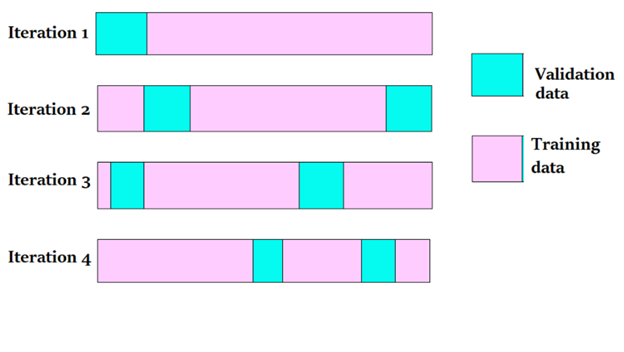

###Pros
•	It contains no randomness.
•	Bias will be reduced.

###Cons
•	This is a complete procedure that is computationally infeasible.


##LeavePOut

In [ ]:
from sklearn.model_selection import LeavePOut

lop = LeavePOut(5)
lop.get_n_splits(X)

for train_index, test_index in lop.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(568, 30) (1, 30) (568,) (1,)


In [ ]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0